# Importação de bibliotecas

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

# Pré-Processamento

## Leitura de dados

In [71]:
import csv

file_path = 'Data/campeonatos_futebol_atualizacao.csv'

ace_df = pd.read_csv(file_path, encoding='latin-1')

In [72]:
ace_df.describe()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tratamentos 1,Tratamentos 2,SubstituiÃ§Ãµes 1,SubstituiÃ§Ãµes 2,Tiros-livres 1,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%)
count,26204.000000,26204.000000,24942.000000,24942.000000,25388.000000,25388.000000,25392.000000,25392.000000,25394.000000,25394.000000,...,5019.000000,5019.000000,9420.000000,9420.000000,6246.000000,6246.000000,6196.000000,6196.000000,25366.000000,25366.000000
mean,4.767287,3.854526,2.139844,1.968527,5.548409,4.459824,6.034302,4.956758,12.694495,12.946444,...,1.995617,2.134489,3.000318,3.001168,14.156260,14.245757,2.676888,3.206908,51.315659,48.508279
std,2.797705,2.444182,1.754924,1.681298,2.975521,2.620973,3.224260,5.451316,4.337402,4.608542,...,2.258323,2.296141,1.020285,1.033004,4.432963,4.335781,1.842689,2.078474,9.834217,9.808893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,10.000000,...,0.000000,0.000000,3.000000,3.000000,11.000000,11.000000,1.000000,2.000000,45.000000,42.000000
50%,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,12.000000,13.000000,...,1.000000,2.000000,3.000000,3.000000,14.000000,14.000000,2.000000,3.000000,52.000000,48.000000
75%,6.000000,5.000000,3.000000,3.000000,7.000000,6.000000,8.000000,7.000000,15.000000,16.000000,...,3.000000,3.000000,3.000000,3.000000,17.000000,17.000000,4.000000,4.000000,58.000000,55.000000
max,90.000000,80.000000,23.000000,15.000000,22.000000,21.000000,23.000000,748.000000,46.000000,180.000000,...,17.000000,16.000000,6.000000,6.000000,36.000000,33.000000,11.000000,17.000000,100.000000,100.000000


## Criação de colunas adicionais

In [73]:
ace_df['Resultado Time 1'] = ace_df.apply(lambda row: '0' if row['Gols 1'] > row['Gols 2'] else ('1' if row['Gols 1'] < row['Gols 2'] else '2'), axis=1)

## Codificação de variáveis não-numéricas

In [74]:
from sklearn.preprocessing import LabelEncoder

# Crie uma cópia do dataframe ace_df
ace_df_encoded = selected_df.copy()

# Instancie o LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas do dataframe
for column in ace_df_encoded.columns:
    # Verifique se a coluna é do tipo 'object'
    if ace_df_encoded[column].dtype == 'object':
        # Aplique a codificação usando o LabelEncoder
        ace_df_encoded[column] = label_encoder.fit_transform(ace_df_encoded[column])

# Verifique o resultado
print(ace_df_encoded)

       Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0                 8.0             0.0             6.0             3.0   
1                 0.0             2.0             0.0             2.0   
2                 4.0             5.0             1.0             5.0   
3                 4.0             7.0             8.0             1.0   
4                 3.0             1.0             1.0             3.0   
...               ...             ...             ...             ...   
27711             6.0             2.0             1.0             0.0   
27712             6.0             0.0             4.0             3.0   
27713             7.0             7.0             2.0             3.0   
27714             6.0             6.0             1.0             2.0   
27715             4.0             2.0             NaN             NaN   

       Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0               7.0           1.0            6

## Visualização 

### DF Adicionais

In [75]:
ace_df_cut1 = ace_df[['Resultado Time 1','Gols 1', 'Gols 2']]

In [76]:
ace_df_cut2 = ace_df.dropna()

In [77]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Resultado Time 1'],
      dtype='object')

In [78]:
ace_df_cut3 = ace_df.drop(columns = ['Tratamentos 1', 'Tratamentos 2','SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2' ], axis = 1)

### Visualização de 2 variáveis

In [84]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Resultado Time 1'],
      dtype='object')

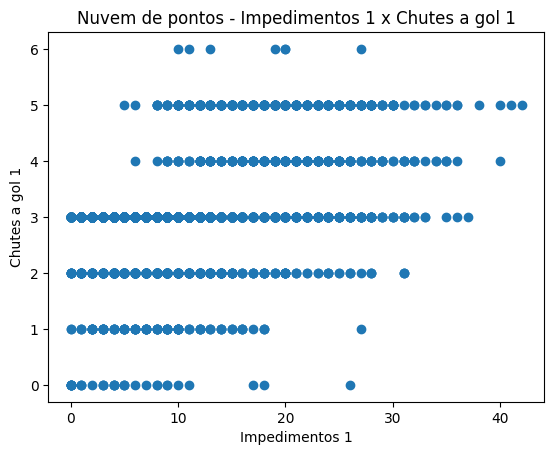

In [88]:
# Visualização de var1 x var2
plt.scatter(ace_df['Laterais 2'], ace_df['SubstituiÃ§Ãµes 2'])
plt.xlabel('Impedimentos 1')
plt.ylabel('Chutes a gol 1')
plt.title('Nuvem de pontos - Impedimentos 1 x Chutes a gol 1')
plt.show()

### Correlação Linear entre variáveis

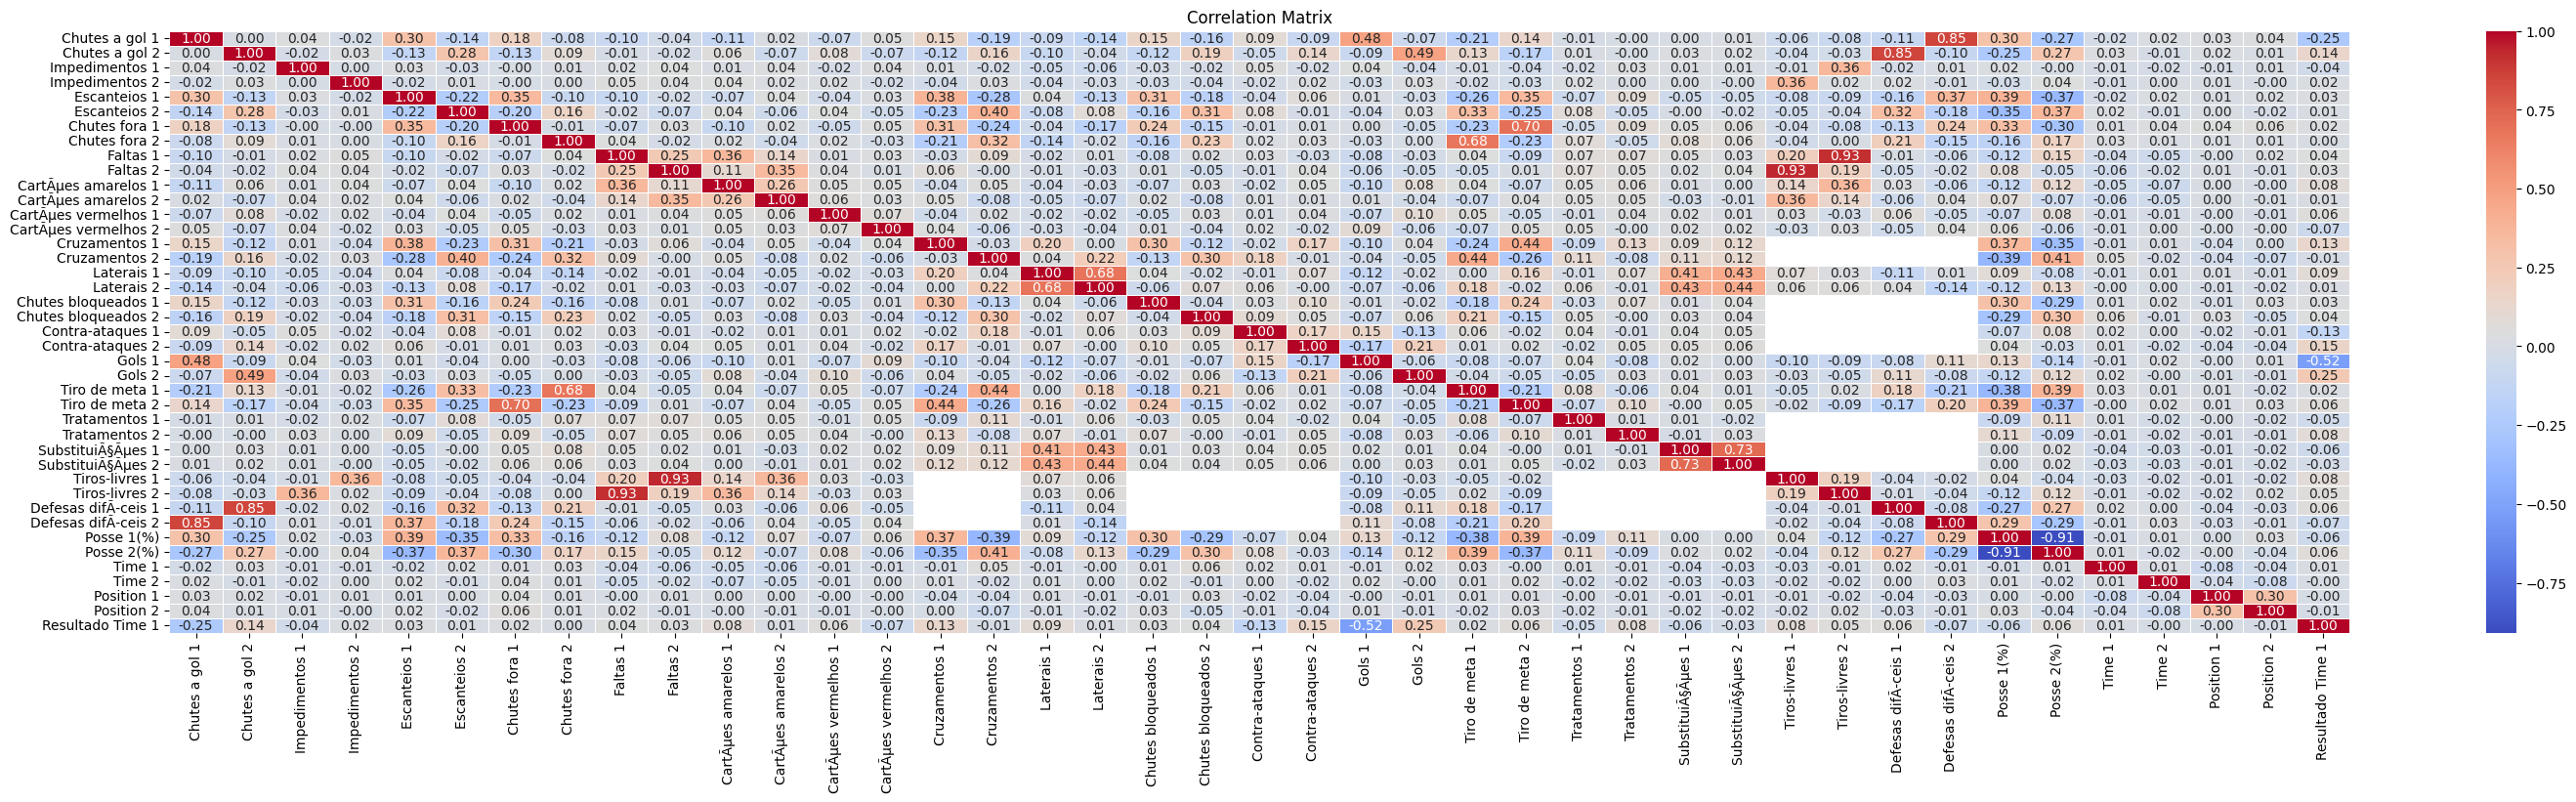

In [80]:
corr = ace_df_encoded.corr(numeric_only=True)

plt.figure(figsize=(36, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Seleção de variáveis

In [81]:
# É possível imprimir o número de valores ausentes em cada coluna do DataFrame
ace_df.isnull().sum()

Chutes a gol 1           1512
Chutes a gol 2           1512
Impedimentos 1           2774
Impedimentos 2           2774
Escanteios 1             2328
Escanteios 2             2328
Chutes fora 1            2324
Chutes fora 2            2324
Faltas 1                 2322
Faltas 2                 2322
CartÃµes amarelos 1         0
CartÃµes amarelos 2         0
CartÃµes vermelhos 1        0
CartÃµes vermelhos 2        0
Cruzamentos 1           18701
Cruzamentos 2           18701
Laterais 1              12549
Laterais 2              12549
Chutes bloqueados 1     18873
Chutes bloqueados 2     18873
Contra-ataques 1        21453
Contra-ataques 2        21453
Gols 1                      0
Gols 2                      0
Tiro de meta 1          15701
Tiro de meta 2          15701
Tratamentos 1           22697
Tratamentos 2           22697
SubstituiÃ§Ãµes 1       18296
SubstituiÃ§Ãµes 2       18296
Tiros-livres 1          21470
Tiros-livres 2          21470
Defesas difÃ­ceis 1     21520
Defesas di

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'], axis=1)
y = ace_df_encoded['Resultado Time 1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



In [91]:
# Create and fit the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [92]:
# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=5)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.6141242519783022


In [98]:
confusion_matrix

array([[1563,  168,  158],
       [ 269,  810,  147],
       [ 468,  282,  293]])